## train the Face Classification model

Download all 9 members' solo pictures in their corresponding folder

In [1]:
from fastai.vision import *
import torch
import os, os.path
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# folder = 'Nayeon'
# file = 'urls_Nayeon.csv'

In [11]:
# folder = 'Jeongyeon'
# file = 'urls_Jeongyeon.csv'

In [16]:
# folder = 'Momo'
# file = 'urls_Momo.csv'

In [20]:
# folder = 'Sana'
# file = 'urls_Sana.csv'

In [24]:
# folder = 'Jihyo'
# file = 'urls_Jihyo.csv'

In [27]:
# folder = 'Mina'
# file = 'urls_Mina.csv'

In [30]:
# folder = 'Dahyun'
# file = 'urls_Dahyun.csv'

In [33]:
# folder = 'Chaeyoung'
# file = 'urls_Chaeyoung.csv'

In [36]:
# folder = 'Tzuyu'
# file = 'urls_Tzuyu.csv'

In [3]:
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [46]:
# path.ls()

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise window.open() coomand doesn't work. Then you can run the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [38]:
download_images(path/file, dest, max_pics=400)

In [40]:
### Verify the pictures
classes =['Nayeon', 'Jeongyeon', 'Momo', 'Sana', 'Chaeyoung', 'Dahyun','Jihyo', 'Tzuyu','Mina']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [45]:
name=[]
count=[]

for c in classes:
    name.append(c)
    count.append(len(os.listdir(path/c)))
pic_count= pd.DataFrame({'name': name, 'pic_count': count})
pic_count

,name,pic_count
0,Nayeon,322
1,Jeongyeon,351
2,Momo,336
3,Sana,339
4,Chaeyoung,374
5,Dahyun,383
6,Jihyo,368
7,Tzuyu,339
8,Mina,367


Now let's crop the faces on images~ gagaga~

In [2]:
#import OpenCV module
import cv2
import os, os.path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

%matplotlib inline

In [3]:
#function to detect face
def detect_face(img):
    #convert the test image to gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #load OpenCV face detector
    face_cas = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cas.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4);
    #if no faces are detected then return image
    if (len(faces) == 0):
        return None, None
    #extract the face
    
    rect=[]
    face=[]
    
    
    for (x, y, w, h) in faces:
        rect.append((x, y, w, h))
        face.append(img[y: y+w, x: x+h])
        
    #return only the face part
    return face[0], rect[0]

In [94]:
sample_path = os.path.join('data/Momo','00000061.jpg')

In [92]:
sample_path

'data/Momo/00000062.jpg'

In [95]:
sample_img = cv2.imread(sample_path)
face, rect = detect_face(sample_img)
# face

In [96]:
##test

cv2.imwrite('test_face.jpg', face)


True

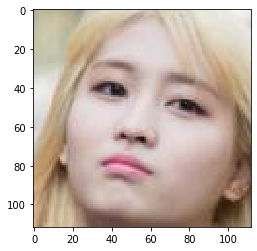

In [97]:
im_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im_rgb)
plt.show()

In [17]:
##create a directory for cropped faces
path =Path(os.getcwd())
folder = 'face_data'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

This method will write all the faces as jpg or png in the face_data folder

In [83]:
#this function will read all members' training face images, detect face #from each image
#and will return two lists of exactly same size, one list
def prepare_training_data(data_folder_path):

#------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)

    for dir_name in dirs:
    #our urls directories start with letter 'urls' so
    #ignore this folder
        if dir_name.startswith("urls") or dir_name.startswith("."):  ##'.ip checkpoint folder'
            continue;
        
        dd.append(dir_name)
        
        Path(os.path.join(dest,dir_name)).mkdir(parents=True, exist_ok=True)
        
        subject_dir_path = os.path.join(data_folder_path, dir_name)
        subject_images_names = os.listdir(subject_dir_path)
        
    
#------STEP-2--------
    #go through each image name, read image,
    #detect face and add face to list of faces
        for image_name in subject_images_names:
            ###in case image is not jpg or png
            if not image_name.endswith('.jpg') and not image_name.endswith('.png'):
                continue;
    #build image path
    #sample image path = training-data/s1/1.pgm
            image_path = os.path.join(subject_dir_path, image_name)
    #read image
            image = cv2.imread(image_path)
#     #display an image window to show the image
#             cv2.imshow("Training on image...", image)
#             cv2.waitKey(100)
    #detect face
            face, rect = detect_face(image)
    
#------STEP-3--------
    #we will ignore faces that are not detected
            if face is not None:
    #add face to list of faces
                cv2.imwrite(os.path.join(dest, dir_name, image_name), face)
        
#     cv2.destroyAllWindows()
#     cv2.waitKey(1)
#     cv2.destroyAllWindows()
    return

In [84]:
prepare_training_data(Path('data'))


In [90]:
name=[]
count=[]
classes =['Nayeon', 'Jeongyeon', 'Momo', 'Sana', 'Chaeyoung', 'Dahyun','Jihyo', 'Tzuyu','Mina']

for c in classes:
    name.append(c)
    count.append(len(os.listdir(os.path.join('face_data', c))))
pic_count= pd.DataFrame({'name': name, 'pic_count': count})
pic_count

,name,pic_count
0,Nayeon,112
1,Jeongyeon,187
2,Momo,162
3,Sana,178
4,Chaeyoung,234
5,Dahyun,207
6,Jihyo,221
7,Tzuyu,236
8,Mina,195


## face classification model using CNN

In [3]:
path=Path('face_data')

In [3]:
np.random.seed(42);
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1,
        ds_tfms=get_transforms(), size=224, num_workers=16).normalize(imagenet_stats)

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Chaeyoung',
  'Dahyun',
  'Jeongyeon',
  'Jihyo',
  'Mina',
  'Momo',
  'Nayeon',
  'Sana',
  'Tzuyu'],
 9,
 1559,
 173)

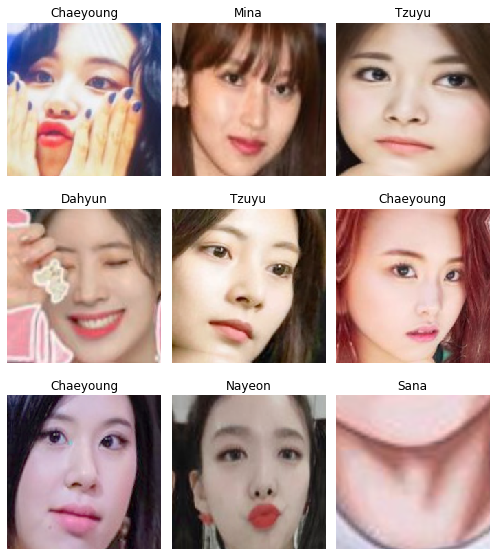

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,2.857125,2.243443,0.739884,01:59
1,2.634017,1.979574,0.630058,02:00
2,2.385631,1.963724,0.630058,02:00


In [13]:
learn.save('twice-stage-1')

In [21]:
learn.unfreeze()

In [19]:
learn.lr_find(start_lr=1e-6, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


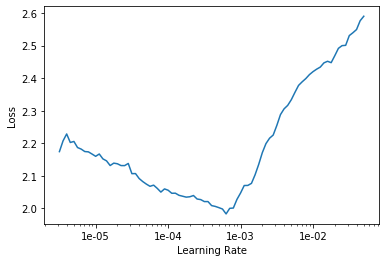

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.113646,1.923099,0.601156,02:01
1,1.983844,1.833199,0.514451,02:01
2,1.783430,1.829208,0.508671,02:01
3,1.633582,1.783643,0.502890,02:01


In [24]:
learn.save('twice-stage-2')

## Interpretation

In [19]:
learn.load('twice-stage-2');

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

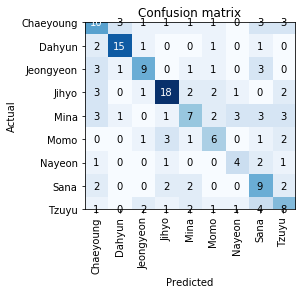

In [21]:
interp.plot_confusion_matrix()

## clean up

In [4]:
from fastai.widgets import *

In [23]:
ds, idxs = DatasetFormatter().from_toplosses(learn)  ##ds is a datasettfm
# top_losses_paths = data.x[idxs]
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

now we have the cleaned.csv

For convenience purpose, I renamed the .csv to cleaned_check_toplosses.csv

But we still need to get rid of the duplicates

In [24]:
df = pd.read_csv(path/'cleaned_check_toplosses.csv', header='infer')
np.random.seed(42)
db = (ImageList.from_df(df, path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )
cln_learn = cnn_learner(db, models.resnet34, metrics=error_rate)
cln_learn = learn.load('twice-stage-2')

In [25]:
ds, idxs = DatasetFormatter().from_similars(cln_learn, layer_ls=[0,7,1], pool=None)
ImageCleaner(ds, idxs, path, duplicates=True)  ## until no duplicates

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Retrain the model with clean.csv

In [21]:
df = pd.read_csv(path/'cleaned_check_toploss_and_similar.csv', header='infer')
np.random.seed(42);
data = (ImageList.from_df(df, path, cols=0)
                   .split_by_rand_pct(valid_pct=0.1, seed=42)
                   .label_from_df(cols=1)
                   .transform(get_transforms(), size=224)
                   .databunch()
     ).normalize(imagenet_stats)

final_learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [31]:
df['label'].value_counts()

Tzuyu        207
Chaeyoung    198
Jihyo        182
Dahyun       178
Jeongyeon    162
Mina         154
Sana         146
Momo         144
Nayeon        99
Name: label, dtype: int64

In [12]:
torch.cuda.device_count();
torch.cuda.get_device_name(0);
torch.cuda.current_device();
torch.cuda.device(0);
torch.cuda.is_available();

1

In [23]:
defaults.device = torch.device('cuda')

In [26]:
final_learn.fit_one_cycle(4, 1e-4, wd=0)

epoch,train_loss,valid_loss,error_rate,time
0,2.896747,2.286379,0.795918,00:10
1,2.900894,2.227284,0.768707,00:10
2,2.855069,2.240305,0.782313,00:10
3,2.834229,2.229315,0.795918,00:10


In [27]:
final_learn.save('clean-twice-stage-1')

In [28]:
final_learn.unfreeze()

In [29]:
final_learn.lr_find(start_lr=1e-6, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


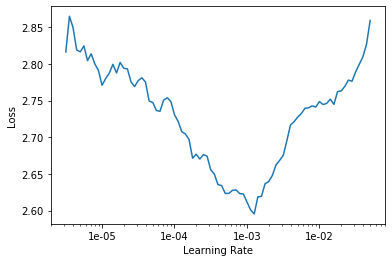

In [31]:
final_learn.recorder.plot()

In [33]:
final_learn.fit_one_cycle(8, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.805201,2.165808,0.782313,00:14
1,2.687279,2.066863,0.734694,00:13
2,2.597356,2.012146,0.700680,00:13
3,2.347989,1.959618,0.625850,00:14
4,2.144660,1.984861,0.591837,00:14
5,1.940508,1.859071,0.578231,00:14
6,1.787856,1.849700,0.571429,00:14
7,1.698146,1.852394,0.564626,00:14


In [34]:
final_learn.fit_one_cycle(8, max_lr=slice(3e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.450095,1.835394,0.585034,00:14
1,1.407253,1.820008,0.564626,00:13
2,1.363841,1.816384,0.551020,00:14
3,1.315041,1.798996,0.551020,00:14
4,1.281614,1.823243,0.564626,00:14
5,1.241826,1.825200,0.557823,00:14
6,1.224827,1.800380,0.557823,00:14
7,1.205665,1.815160,0.551020,00:14


In [35]:
final_learn.save('clean-twice-stage-2')

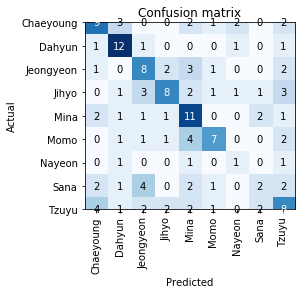

In [36]:
interp = ClassificationInterpretation.from_learner(final_learn)
interp.plot_confusion_matrix()

## Further fine-tune by increasing resolution of the image

In [5]:
df = pd.read_csv(path/'cleaned_check_toploss_and_similar.csv', header='infer')
np.random.seed(42);
high_resolution_data = (ImageList.from_df(df, path, cols=0)
                   .split_by_rand_pct(valid_pct=0.1, seed=42)
                   .label_from_df(cols=1)
                   .transform(get_transforms(), size=256)
                   .databunch()
     ).normalize(imagenet_stats)

hr_learn = cnn_learner(high_resolution_data, models.resnet34, metrics=error_rate)

In [14]:
hr_learn.load('clean-twice-stage-2')

In [7]:
hr_learn.freeze()

In [8]:
hr_learn.fit_one_cycle(8, 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,1.271904,1.825956,0.564626,00:19
1,1.217182,1.822441,0.564626,00:12
2,1.244389,1.815871,0.544218,00:12
3,1.249114,1.811180,0.551020,00:12
4,1.223255,1.814560,0.551020,00:12
5,1.199735,1.809981,0.564626,00:12
6,1.208053,1.814548,0.551020,00:12
7,1.179882,1.818518,0.564626,00:12


In [9]:
hr_learn.save('clean-hr-twice-stage-1')

In [10]:
hr_learn.unfreeze()

In [11]:
hr_learn.fit_one_cycle(8, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.181125,1.830412,0.537415,00:18
1,1.164819,1.794053,0.496599,00:17
2,1.100410,1.838148,0.530612,00:17
3,1.008880,2.122186,0.489796,00:17
4,0.912062,2.032855,0.496599,00:17
5,0.809582,1.866635,0.476190,00:17
6,0.708871,1.841625,0.476190,00:17
7,0.624965,1.848963,0.455782,00:17


In [12]:
hr_learn.fit_one_cycle(8, max_lr=slice(3e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.490321,1.855012,0.455782,00:17
1,0.479784,1.868400,0.489796,00:17
2,0.453196,1.903262,0.476190,00:17
3,0.442274,1.880839,0.455782,00:17
4,0.406227,1.859884,0.435374,00:17
5,0.396651,1.885434,0.442177,00:17
6,0.370560,1.887539,0.435374,00:17
7,0.361823,1.875891,0.428571,00:17


In [13]:
hr_learn.fit_one_cycle(8, max_lr=slice(3e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.352062,1.884888,0.455782,00:17
1,0.328655,1.894565,0.442177,00:17
2,0.318210,1.932814,0.442177,00:17
3,0.311866,1.956732,0.448980,00:17
4,0.303945,1.951463,0.442177,00:17
5,0.280510,1.918324,0.442177,00:17
6,0.260132,1.905333,0.435374,00:17
7,0.249934,1.888086,0.435374,00:17


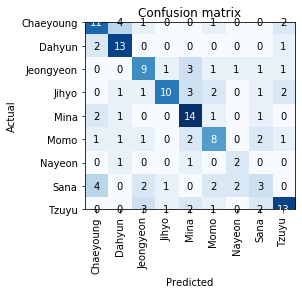

In [16]:
hr_learn.save('clean-hr-twice-stage-2')
interp = ClassificationInterpretation.from_learner(hr_learn)
interp.plot_confusion_matrix()

In [6]:
hhr_data = (ImageList.from_df(df, path, cols=0)
                   .split_by_rand_pct(valid_pct=0.1, seed=42)
                   .label_from_df(cols=1)
                   .transform(get_transforms(), size=340)
                   .databunch()
     ).normalize(imagenet_stats)

hhr_learn = cnn_learner(hhr_data, models.resnet34, metrics=error_rate)

In [9]:
hhr_learn.load('clean-hr-twice-stage-2')
hhr_learn.unfreeze()
hhr_learn.fit_one_cycle(8, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.765652,1.996002,0.482993,00:34
1,0.701272,1.883514,0.428571,00:33
2,0.667148,2.179999,0.503401,00:32
3,0.630558,2.132667,0.455782,00:32
4,0.553024,2.160596,0.476190,00:33
5,0.478485,2.049753,0.435374,00:33
6,0.417052,2.030078,0.394558,00:32
7,0.363026,1.983419,0.408163,00:33


In [10]:
hhr_learn.fit_one_cycle(8, max_lr=slice(3e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.250576,1.990372,0.408163,00:32
1,0.228055,1.950574,0.387755,00:33
2,0.216270,1.969183,0.394558,00:33
3,0.201602,1.927649,0.387755,00:33
4,0.180920,1.960110,0.380952,00:32
5,0.167043,1.989276,0.394558,00:33
6,0.160476,1.978849,0.387755,00:32
7,0.157807,1.984197,0.387755,00:33


In [11]:
hhr_learn.fit_one_cycle(20, max_lr=slice(3e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.161222,1.990810,0.394558,00:33
1,0.148518,2.010506,0.401361,00:32
2,0.147171,1.986222,0.387755,00:33
3,0.142881,2.038301,0.387755,00:32
4,0.136907,2.128551,0.394558,00:32
5,0.129896,2.126411,0.401361,00:33
6,0.122806,2.092321,0.374150,00:33
7,0.117888,2.162778,0.408163,00:33
8,0.110332,2.086459,0.374150,00:32
9,0.103328,2.047458,0.367347,00:33


In [12]:
hhr_learn.save('final_20191023')

In [7]:
# hhr_learn.load('final_20191023')
# hhr_learn.export()

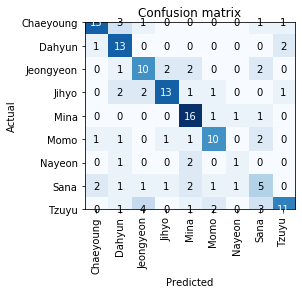

In [13]:
interp = ClassificationInterpretation.from_learner(hhr_learn)
interp.plot_confusion_matrix()

##  Put into production

In [9]:
defaults.device = torch.device('cpu')

In [12]:
path=Path('face_data')
learn = load_learner(path)

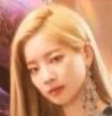

In [10]:
img = open_image('test.png')
img

fastai.vision.image.Image

In [13]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Dahyun

In [17]:
str(pred_class)

'Dahyun'

In [15]:
outputs

tensor([1.2740e-02, 6.1183e-01, 1.9492e-03, 3.4755e-01, 2.0553e-04, 2.7067e-05,
        2.1886e-02, 3.1993e-03, 6.1211e-04])

In [14]:
pred_idx

tensor(1)